['../comparisons/VAdamNO.txt', '../comparisons/VAdamSM.txt', '../comparisons/VSGDNO.txt', '../comparisons/VSGDSM.txt']
0.8961812021123966
0.7082328520406606
0.759119631246375
0.7176959003632589


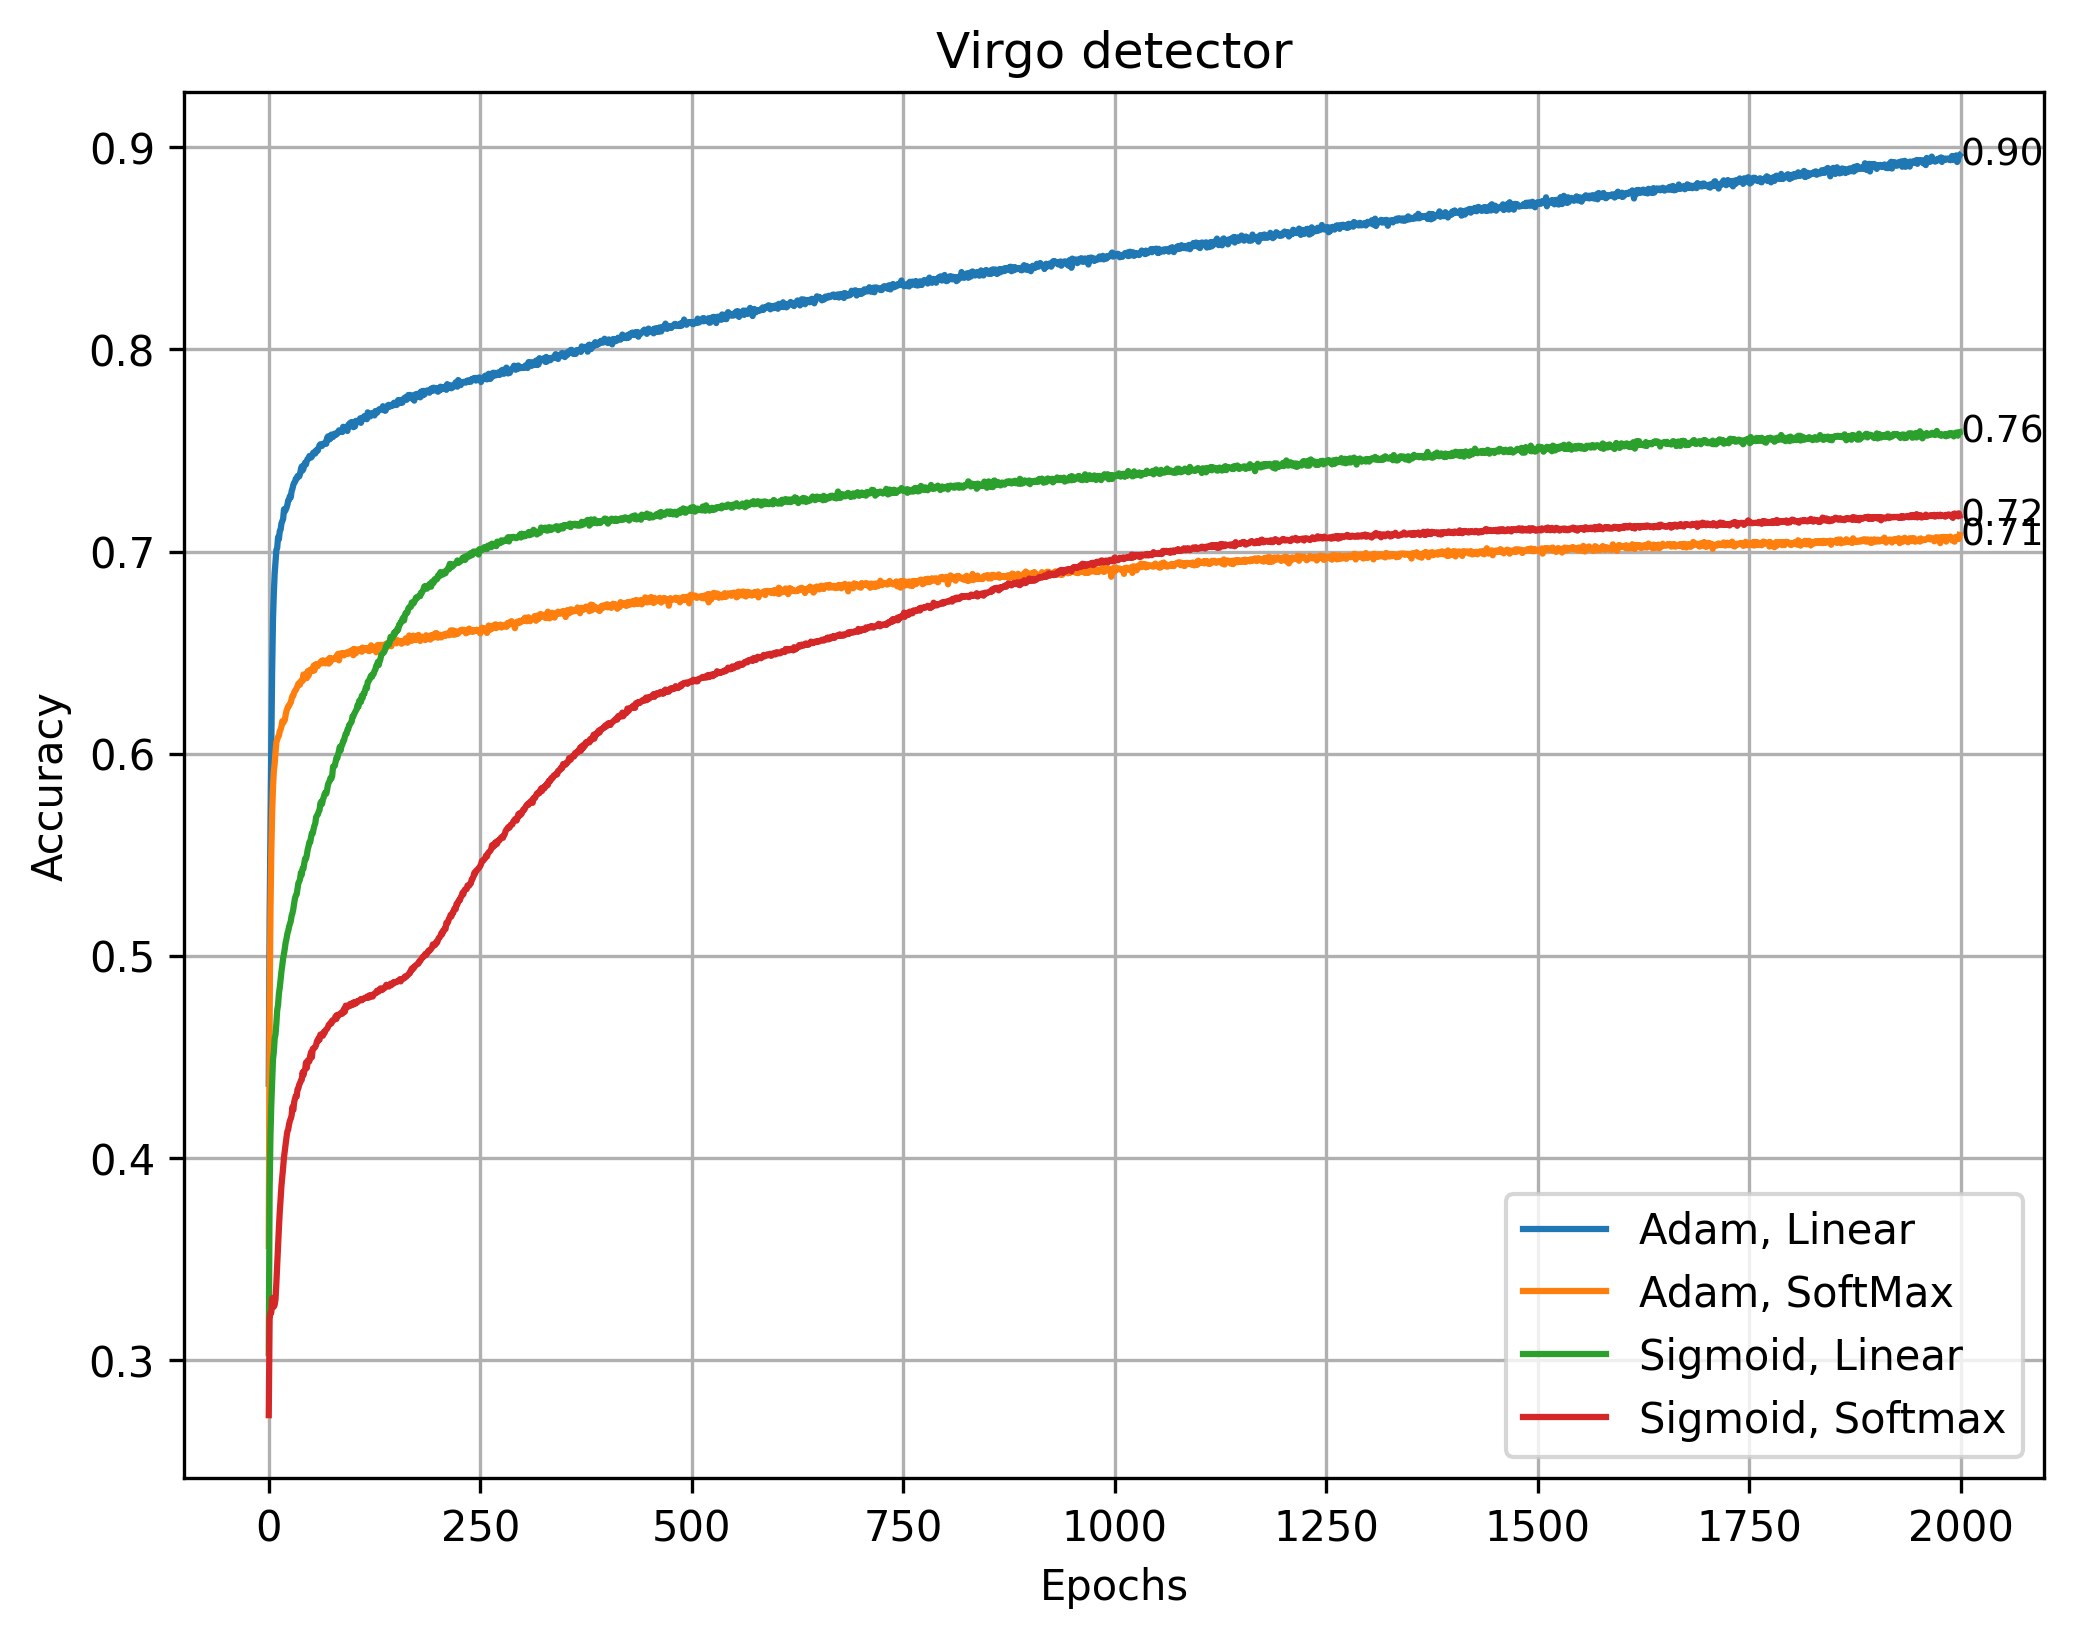

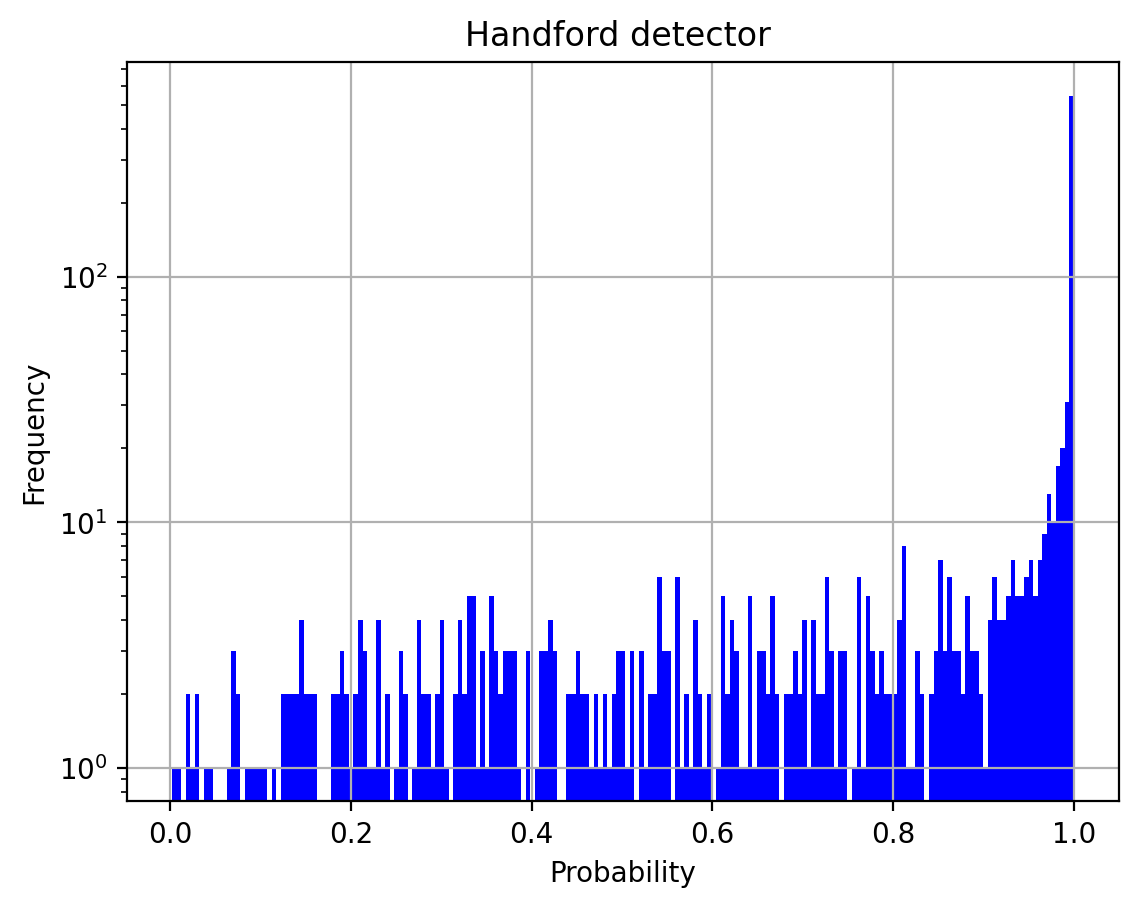

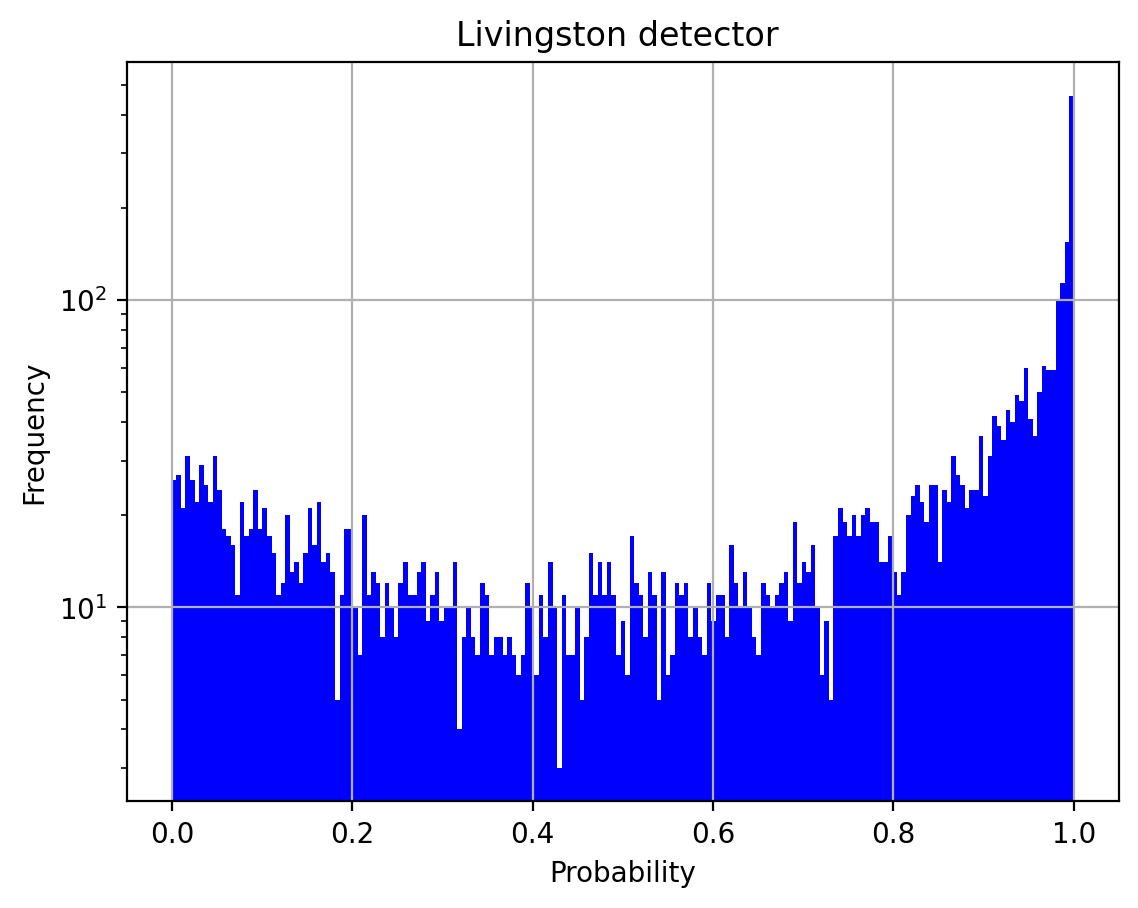

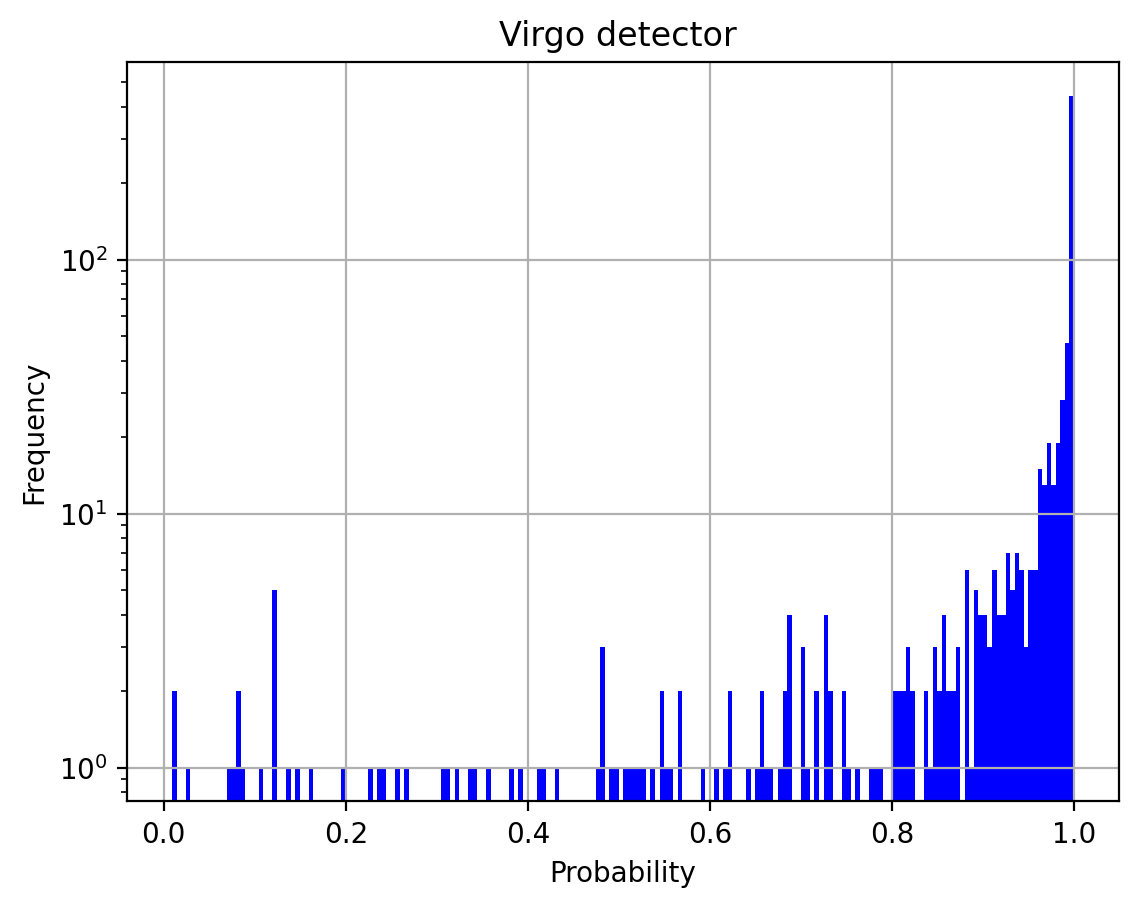

<Figure size 1280x960 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np

file_paths = ['../comparisons/VAdamNO.txt', '../comparisons/VAdamSM.txt',  '../comparisons/VSGDNO.txt', '../comparisons/VSGDSM.txt', '../DataArraysV2/Vloss10k.txt','../DataArraysV2/Vvalidloss10k.txt', '../DataArraysV2/HProbabilities10k.txt', '../DataArraysV2/LProbabilities10k.txt','../DataArraysV2/VProbabilities10k.txt']

# Create subplots
plt.rcParams['figure.dpi'] = 200
fig, (ax1) = plt.subplots(1, 1, sharex=False, figsize=(8, 6))

print(file_paths[:4])

for file_path in file_paths[:4]:
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]  # Only the first 5000 points
        ax1.plot(data, label=file_path)
        print(data[-1])
        epoches = len(data)
        ax1.text(epoches, data[-1], f"{data[-1]:.2f}", fontsize=9, verticalalignment='center')


#for file_path in file_paths[3:6]:
 #   with open(file_path, 'r') as file:
  #      data = [float(line.strip()) for line in file]  # Only the first 5000 points
   #     ax2.plot(data, label=file_path)


#with open(file_paths[4], 'r') as file:       
#       data = [float(line.strip(' []\n')) for line in file]  # Remove square brackets, spaces, and newline characters#      
        #bin_width = 0.01
   #     bins = int((max(data) - min(data)) / bin_width)
    #    ax2.hist(data, bins=bins, linestyle='-', color='black')

# Customize the plot for the first subplot (Loss)
ax1.set_title("Virgo detector")
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.grid(True)

# Customize the plot for the second subplot (Accuracy)
#ax2.set_title("Learning rate of $2.5*10^{-5}$")
#ax2.set_xlabel('Epochs')
#ax2.set_ylabel('Loss')
#ax2.grid(True)

# Add legends
ax1.legend(['Adam, Linear','Adam, SoftMax', 'Sigmoid, Linear', 'Sigmoid, Softmax'])

plt.show()


with open(file_paths[6], 'r') as file:
    data = [float(line.strip(' []\n')) for line in file]
    bin_width = 0.005
    bins = int((max(data) - min(data)) / bin_width)
    plt.hist(data, bins=bins, range=(min(data), max(data)), linestyle='-', color='#0000ff', align='mid', edgecolor='none')  
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.yscale('log')

    plt.grid(True)
    plt.title("Handford detector ")

plt.show()

with open(file_paths[7], 'r') as file:
    data = [float(line.strip(' []\n')) for line in file]
    bin_width = 0.005
    bins = int((max(data) - min(data)) / bin_width)
    plt.hist(data, bins=bins, range=(min(data), max(data)), linestyle='-', color='#0000ff', align='mid', edgecolor='none')  
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.grid(True)
    plt.title("Livingston detector ")

plt.show()

with open(file_paths[8], 'r') as file:
    data = [float(line.strip(' []\n')) for line in file]
    bin_width = 0.005
    bins = int((max(data) - min(data)) / bin_width)
    plt.hist(data, bins=bins, range=(min(data), max(data)), linestyle='-', color='#0000ff', align='mid', edgecolor='none')  
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.grid(True)
    plt.title("Virgo detector ")

plt.show()
plt.savefig('VProbv3.png',dpi=300)

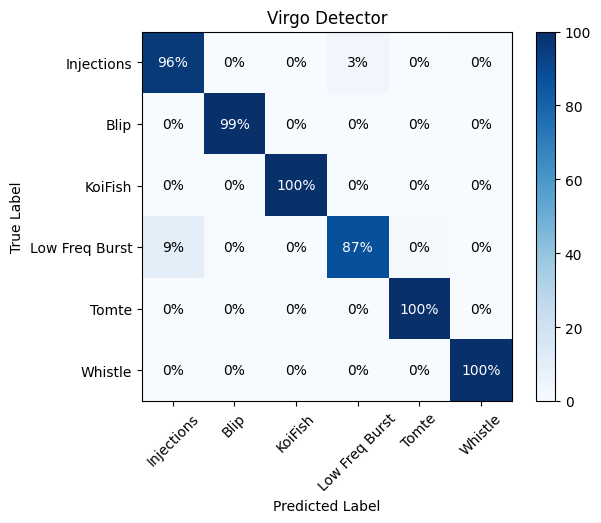

In [6]:
plt.figure()

# Read the confusion matrix with percentages from the text file
cm = np.loadtxt("../DataArraysV2/Vconfusion_matrix.txt", delimiter="\t")

# Calculate the confusion matrix with percentages
cm_percentage = (cm / cm.sum(axis=1)[:, np.newaxis]) * 100

# Visualize the confusion matrix as a heatmap with percentages
plt.imshow(cm_percentage, interpolation="nearest", cmap=plt.cm.Blues, vmin=0, vmax=100)
plt.title("Virgo Detector")
plt.colorbar()

# Labeling the axes
classes = ["Injections", "Blip", "KoiFish", "Low Freq Burst", "Tomte", "Whistle"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display the percentages in each cell as integers
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{int(cm_percentage[i, j])}%", ha="center", va="center", color="white" if cm_percentage[i, j] > 50 else "black")

# Show the plot
plt.show()
